<a href="https://colab.research.google.com/github/viswambhar-yasa/Wind_turbine_energy/blob/main/Windy_day_energy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Wind Turbine Energy prediction

In [286]:
# importing libraries 
import tensorflow as tf
import tensorflow.keras as tfk
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [287]:
print('TensorFlow Version')
print(tf.__version__)

TensorFlow Version
2.5.0


## Importing Datasets

In [288]:
data=pd.read_csv("https://raw.githubusercontent.com/viswambhar-yasa/Wind_turbine_energy/main/train.csv")
data.head()


,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
0,WM_33725,2019-08-04 14:33:20,94.820023,-99.000000,41.723019,-0.903423,82.410573,42.523015,2563.124522,76.665560,103402.961872,26.897875,NaN,239.836388,2730.310605,42.084666,BA,Medium,2.217542,0.314065,24.281689,6.766521
1,WM_698,2018-11-05 10:13:20,241.832734,27.764785,-99.000000,-99.000000,44.104919,46.258870,2372.384119,78.129803,17030.904078,39.801469,NaN,337.944723,1780.207200,107.888643,A2,Medium,4.210346,0.448494,27.262139,5.966275
2,WM_39146,2019-09-14 14:03:20,95.484724,NaN,41.855473,12.652763,42.322098,42.878552,1657.169646,67.654469,16125.927107,36.116065,45.033197,227.850294,1666.049900,-42.931459,ABC,Medium,2.719475,0.302321,27.366127,2.874342
3,WM_6757,2018-12-25 15:33:20,238.819424,-99.000000,45.443914,15.115323,44.759643,47.282101,2888.134079,95.389974,18689.732336,46.020045,44.827154,492.081520,1964.502895,42.744596,ABC,NaN,4.857385,0.367140,24.287767,14.851089
4,WM_21521,2019-05-04 03:13:20,10.722890,NaN,41.981183,1.715696,-17.616459,43.469852,781.695419,37.423065,114468.169007,34.572941,-99.000000,259.274601,1177.516152,13.387289,AAA,Medium,NaN,0.453374,27.971650,3.519074


In [289]:
data.columns

Index(['tracking_id', 'datetime', 'wind_speed(m/s)',
       'atmospheric_temperature(°C)', 'shaft_temperature(°C)',
       'blades_angle(°)', 'gearbox_temperature(°C)', 'engine_temperature(°C)',
       'motor_torque(N-m)', 'generator_temperature(°C)',
       'atmospheric_pressure(Pascal)', 'area_temperature(°C)',
       'windmill_body_temperature(°C)', 'wind_direction(°)', 'resistance(ohm)',
       'rotor_torque(N-m)', 'turbine_status', 'cloud_level', 'blade_length(m)',
       'blade_breadth(m)', 'windmill_height(m)',
       'windmill_generated_power(kW/h)'],
      dtype='object')

In [290]:
gk=data.groupby("tracking_id")
gk.first()
gk.get_group("WM_6757")


,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
3,2018-12-25 15:33:20,238.819424,-99.0,45.443914,15.115323,44.759643,47.282101,2888.134079,95.389974,18689.732336,46.020045,44.827154,492.08152,1964.502895,42.744596,ABC,NaN,4.857385,0.36714,24.287767,14.851089


In [291]:
gk.ngroups,len(data)

(28200, 28200)

In [292]:
print('All are unique wind turbines')

All are unique wind turbines


### Removing NAN and creating features and outputs 

In [293]:
print("Number of nan values per column: ")
data.isnull().sum()

Number of nan values per column: 


tracking_id                          0
datetime                             0
wind_speed(m/s)                    273
atmospheric_temperature(°C)       3450
shaft_temperature(°C)                2
blades_angle(°)                    216
gearbox_temperature(°C)              1
engine_temperature(°C)              12
motor_torque(N-m)                   24
generator_temperature(°C)           12
atmospheric_pressure(Pascal)      2707
area_temperature(°C)                 0
windmill_body_temperature(°C)     2363
wind_direction(°)                 5103
resistance(ohm)                      1
rotor_torque(N-m)                  572
turbine_status                    1759
cloud_level                        276
blade_length(m)                   5093
blade_breadth(m)                     0
windmill_height(m)                 543
windmill_generated_power(kW/h)     207
dtype: int64

In [294]:
X_tr=data.drop(["tracking_id","datetime","windmill_generated_power(kW/h)"],axis=1)
Y_tr=data["windmill_generated_power(kW/h)"]
X_tr=X_tr.replace(-99,np.nan)
X_tr=X_tr.fillna(0)
Y_tr=Y_tr.fillna(0)
#print(X_tr[["wind_speed(m/s)",	"gearbox_temperature(°C)"]])
X_tr[["wind_speed(m/s)",	"atmospheric_temperature(°C)"	,"shaft_temperature(°C)",	"blades_angle(°)",	"gearbox_temperature(°C)"	,"engine_temperature(°C)"	,"motor_torque(N-m)"	,"generator_temperature(°C)"	,"atmospheric_pressure(Pascal)",	"area_temperature(°C)"	,"windmill_body_temperature(°C)"	,"wind_direction(°)",	"resistance(ohm)",	"rotor_torque(N-m)",			"blade_length(m)",	"blade_breadth(m)",	"windmill_height(m)"]]=abs(X_tr[["wind_speed(m/s)",	"atmospheric_temperature(°C)"	,"shaft_temperature(°C)",	"blades_angle(°)",	"gearbox_temperature(°C)"	,"engine_temperature(°C)"	,"motor_torque(N-m)"	,"generator_temperature(°C)"	,"atmospheric_pressure(Pascal)",	"area_temperature(°C)"	,"windmill_body_temperature(°C)"	,"wind_direction(°)",	"resistance(ohm)",	"rotor_torque(N-m)",			"blade_length(m)",	"blade_breadth(m)",	"windmill_height(m)"]])
X_tr.head()

,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m)
0,94.820023,0.000000,41.723019,0.903423,82.410573,42.523015,2563.124522,76.665560,103402.961872,26.897875,0.000000,239.836388,2730.310605,42.084666,BA,Medium,2.217542,0.314065,24.281689
1,241.832734,27.764785,0.000000,0.000000,44.104919,46.258870,2372.384119,78.129803,17030.904078,39.801469,0.000000,337.944723,1780.207200,107.888643,A2,Medium,4.210346,0.448494,27.262139
2,95.484724,0.000000,41.855473,12.652763,42.322098,42.878552,1657.169646,67.654469,16125.927107,36.116065,45.033197,227.850294,1666.049900,42.931459,ABC,Medium,2.719475,0.302321,27.366127
3,238.819424,0.000000,45.443914,15.115323,44.759643,47.282101,2888.134079,95.389974,18689.732336,46.020045,44.827154,492.081520,1964.502895,42.744596,ABC,0,4.857385,0.367140,24.287767
4,10.722890,0.000000,41.981183,1.715696,17.616459,43.469852,781.695419,37.423065,114468.169007,34.572941,0.000000,259.274601,1177.516152,13.387289,AAA,Medium,0.000000,0.453374,27.971650


#### The features are hot encoded to extract main features and checking if any column has null values

In [295]:
X_tr=pd.get_dummies(X_tr)
print(X_tr.isnull().any() )
print('Any null values')
print(X_tr.isnull().sum().sum())

wind_speed(m/s)                  False
atmospheric_temperature(°C)      False
shaft_temperature(°C)            False
blades_angle(°)                  False
gearbox_temperature(°C)          False
engine_temperature(°C)           False
motor_torque(N-m)                False
generator_temperature(°C)        False
atmospheric_pressure(Pascal)     False
area_temperature(°C)             False
windmill_body_temperature(°C)    False
wind_direction(°)                False
resistance(ohm)                  False
rotor_torque(N-m)                False
blade_length(m)                  False
blade_breadth(m)                 False
windmill_height(m)               False
turbine_status_0                 False
turbine_status_A                 False
turbine_status_A2                False
turbine_status_AAA               False
turbine_status_AB                False
turbine_status_ABC               False
turbine_status_AC                False
turbine_status_B                 False
turbine_status_B2        

In [296]:
X_tr.head()

,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),blade_length(m),blade_breadth(m),windmill_height(m),turbine_status_0,turbine_status_A,turbine_status_A2,turbine_status_AAA,turbine_status_AB,turbine_status_ABC,turbine_status_AC,turbine_status_B,turbine_status_B2,turbine_status_BA,turbine_status_BB,turbine_status_BBB,turbine_status_BCB,turbine_status_BD,turbine_status_D,cloud_level_0,cloud_level_Extremely Low,cloud_level_Low,cloud_level_Medium
0,94.820023,0.000000,41.723019,0.903423,82.410573,42.523015,2563.124522,76.665560,103402.961872,26.897875,0.000000,239.836388,2730.310605,42.084666,2.217542,0.314065,24.281689,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,241.832734,27.764785,0.000000,0.000000,44.104919,46.258870,2372.384119,78.129803,17030.904078,39.801469,0.000000,337.944723,1780.207200,107.888643,4.210346,0.448494,27.262139,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,95.484724,0.000000,41.855473,12.652763,42.322098,42.878552,1657.169646,67.654469,16125.927107,36.116065,45.033197,227.850294,1666.049900,42.931459,2.719475,0.302321,27.366127,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,238.819424,0.000000,45.443914,15.115323,44.759643,47.282101,2888.134079,95.389974,18689.732336,46.020045,44.827154,492.081520,1964.502895,42.744596,4.857385,0.367140,24.287767,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,10.722890,0.000000,41.981183,1.715696,17.616459,43.469852,781.695419,37.423065,114468.169007,34.572941,0.000000,259.274601,1177.516152,13.387289,0.000000,0.453374,27.971650,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [297]:
# splitting datasets in test and train
from sklearn.model_selection import train_test_split
X_training,X_V,Y_training,Y_V=train_test_split(X_tr,Y_tr,test_size=0.25)

In [298]:
wind_model=tfk.Sequential([
                          tfk.layers.Dense(50,input_shape=[36,],activation='relu',name='hidden_layer1'),  
                          tfk.layers.Dense(1,input_shape=[50,],name='output_layer')  
                           
],name='wind_model')

wind_model.compile(loss=tfk.losses.mae,
                   optimizer=tfk.optimizers.Adam(learning_rate=0.001),metrics = ["accuracy"])

wind_model_hist=wind_model.fit(X_training,Y_training,epochs=25,verbose=1)

Epoch 1/25
661/661 [==============================] - 1s 1ms/step - loss: 1165.6838 - accuracy: 0.0031
Epoch 2/25
661/661 [==============================] - 1s 1ms/step - loss: 55.1837 - accuracy: 0.0027
Epoch 3/25
661/661 [==============================] - 1s 1ms/step - loss: 71.8070 - accuracy: 0.0030
Epoch 4/25
661/661 [==============================] - 1s 1ms/step - loss: 75.6652 - accuracy: 0.0025
Epoch 5/25
661/661 [==============================] - 1s 1ms/step - loss: 59.7260 - accuracy: 0.0025
Epoch 6/25
661/661 [==============================] - 1s 1ms/step - loss: 81.7282 - accuracy: 0.0028
Epoch 7/25
661/661 [==============================] - 1s 1ms/step - loss: 61.9939 - accuracy: 0.0029
Epoch 8/25
661/661 [==============================] - 1s 1ms/step - loss: 60.6580 - accuracy: 0.0029
Epoch 9/25
661/661 [==============================] - 1s 1ms/step - loss: 58.8440 - accuracy: 0.0027
Epoch 10/25
661/661 [==============================] - 1s 1ms/step - loss: 47.6012 - accu

In [299]:
wind_model.evaluate(X_V,Y_V)

221/221 [==============================] - 0s 1ms/step - loss: 25.1090 - accuracy: 0.0044


[25.109046936035156, 0.004397163167595863]

#### Data Preprocessing 
1. Normalization

In [300]:
from sklearn.preprocessing import MinMaxScaler
normalization=MinMaxScaler()
X_train=normalization.fit_transform(X_tr)
print(X_tr.loc[0])
print('Normalized data')
print(X_train[0,:])
(m,n)=X_train.shape
print('Number of feature :',n)
print('Number of training examples:', m)

wind_speed(m/s)                      94.820023
atmospheric_temperature(°C)           0.000000
shaft_temperature(°C)                41.723019
blades_angle(°)                       0.903423
gearbox_temperature(°C)              82.410573
engine_temperature(°C)               42.523015
motor_torque(N-m)                  2563.124522
generator_temperature(°C)            76.665560
atmospheric_pressure(Pascal)     103402.961872
area_temperature(°C)                 26.897875
windmill_body_temperature(°C)         0.000000
wind_direction(°)                   239.836388
resistance(ohm)                    2730.310605
rotor_torque(N-m)                    42.084666
blade_length(m)                       2.217542
blade_breadth(m)                      0.314065
windmill_height(m)                   24.281689
turbine_status_0                      0.000000
turbine_status_A                      0.000000
turbine_status_A2                     0.000000
turbine_status_AAA                    0.000000
turbine_statu


# Deep NN model creation

In [313]:
wind_model_1=tfk.Sequential([
                          tfk.layers.Dense(50,input_shape=[36,],activation='relu',name='hidden_layer1',kernel_regularizer='l2'),
                          tfk.layers.Dense(20,input_shape=[50,],activation='relu',name='hidden_layer2',kernel_regularizer='l2'),  
                          tfk.layers.Dense(10,input_shape=[20,],activation='relu',name='hidden_layer3',kernel_regularizer='l2'),  
                          tfk.layers.Dense(1,input_shape=[10,],name='output_layer')  
                           
],name='wind_model_1')

wind_model_1.compile(loss=tfk.losses.mse,
                   optimizer=tfk.optimizers.Adam(learning_rate=0.001),metrics = ["mae"])

wind_model_hist_1=wind_model_1.fit(X_training,Y_training,epochs=50,verbose=1)

Epoch 1/50
661/661 [==============================] - 1s 1ms/step - loss: 38545.7969 - mae: 25.7874
Epoch 2/50
661/661 [==============================] - 1s 1ms/step - loss: 18.7956 - mae: 2.7655
Epoch 3/50
661/661 [==============================] - 1s 1ms/step - loss: 29.8158 - mae: 3.0779
Epoch 4/50
661/661 [==============================] - 1s 1ms/step - loss: 12016.4482 - mae: 27.2450
Epoch 5/50
661/661 [==============================] - 1s 1ms/step - loss: 45.0489 - mae: 3.7150
Epoch 6/50
661/661 [==============================] - 1s 1ms/step - loss: 69.4537 - mae: 3.6173
Epoch 7/50
661/661 [==============================] - 1s 1ms/step - loss: 200.7052 - mae: 5.7909
Epoch 8/50
661/661 [==============================] - 1s 1ms/step - loss: 987.2106 - mae: 10.9828
Epoch 9/50
661/661 [==============================] - 1s 1ms/step - loss: 1068.3563 - mae: 7.2142
Epoch 10/50
661/661 [==============================] - 1s 1ms/step - loss: 1324.1537 - mae: 9.0072
Epoch 11/50
661/661 [===

In [314]:
wind_model_1.evaluate(X_V,Y_V)

221/221 [==============================] - 0s 955us/step - loss: 4.4317 - mae: 1.4693


[4.43172025680542, 1.469262719154358]

In [329]:
Y_p=wind_model_1.predict(X_V)
Y_p[:10,0],Y_V

(array([ 3.3699737, 10.509746 ,  4.899766 ,  6.526023 ,  4.516389 ,
         9.058022 ,  5.7171664, 10.010459 ,  6.223035 ,  5.290847 ],
       dtype=float32), 23910    3.010459
 17659    9.990649
 24654    8.349110
 9947     5.539922
 22523    3.455353
            ...   
 23719    6.550042
 11716    9.061500
 25690    5.231021
 12243    4.113095
 15949    7.955459
 Name: windmill_generated_power(kW/h), Length: 7050, dtype: float64)

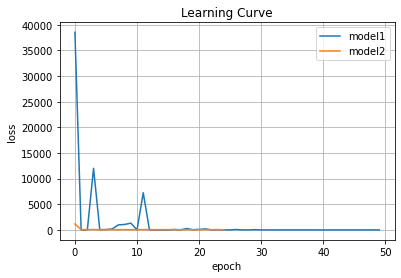

In [316]:
plt.plot(wind_model_hist_1.epoch,wind_model_hist_1.history["loss"],label='model1')
plt.plot(wind_model_hist.epoch,wind_model_hist.history["loss"],label='model2')
plt.title('Learning Curve')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.grid()

In [317]:
test_data=pd.read_csv("https://raw.githubusercontent.com/viswambhar-yasa/Wind_turbine_energy/main/test.csv")
test_data.head()

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m)
0,WM_19817,2019-04-17 08:53:20,94.324266,17.641186,89.714193,51.146788,40.460560,39.594734,1073.202715,66.830037,16681.044117,24.004812,43.756693,445.976992,1664.222023,21.912243,BA,Medium,3.185837,0.403965,25.572431
1,WM_18723,2019-03-30 07:43:20,10.088870,13.978119,43.272846,46.516394,40.027788,41.176860,517.436430,37.284163,NaN,29.431813,42.728174,499.595287,1165.111992,-35.050093,A,Medium,3.016603,0.444755,24.371823
2,WM_34552,2019-08-10 11:33:20,347.152090,31.423035,41.076640,26.931602,43.109122,43.439556,1480.716492,70.010762,214812.836175,29.924235,43.256122,245.432231,1667.720491,27.195302,B2,Medium,2.611941,0.387368,27.654677
3,WM_28570,2019-06-26 03:53:20,24.471997,-99.000000,14.375078,66.513953,13.741253,15.577472,887.979475,41.445258,NaN,23.886434,13.501595,NaN,1329.744740,15.245757,BBB,Low,2.866805,0.450478,24.189426
4,WM_36934,2019-08-27 16:43:20,96.997026,33.281836,41.405192,1.843112,121.572907,43.934587,2053.916354,68.007787,16833.546517,35.906889,-99.000000,442.425744,691.408996,34.257024,A,Low,3.549672,0.368355,4.885440


In [318]:
print("Number of nan values per column: ")
test_data.isnull().sum()

Number of nan values per column: 


tracking_id                         0
datetime                            0
wind_speed(m/s)                   126
atmospheric_temperature(°C)      1427
shaft_temperature(°C)               1
blades_angle(°)                   106
gearbox_temperature(°C)             1
engine_temperature(°C)              5
motor_torque(N-m)                  11
generator_temperature(°C)           5
atmospheric_pressure(Pascal)     1151
area_temperature(°C)                1
windmill_body_temperature(°C)     926
wind_direction(°)                2160
resistance(ohm)                     0
rotor_torque(N-m)                 281
turbine_status                    797
cloud_level                       125
blade_length(m)                  2114
blade_breadth(m)                    0
windmill_height(m)                255
dtype: int64

In [319]:
X_predict=test_data.drop(["tracking_id","datetime"],axis=1)
X_predict=X_predict.replace(-99,np.nan)
X_predict=X_predict.fillna(0)
X_predict=pd.get_dummies(X_predict)
X_predict.head()

,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),blade_length(m),blade_breadth(m),windmill_height(m),turbine_status_0,turbine_status_A,turbine_status_A2,turbine_status_AAA,turbine_status_AB,turbine_status_ABC,turbine_status_AC,turbine_status_B,turbine_status_B2,turbine_status_BA,turbine_status_BB,turbine_status_BBB,turbine_status_BCB,turbine_status_BD,turbine_status_D,cloud_level_0,cloud_level_Extremely Low,cloud_level_Low,cloud_level_Medium
0,94.324266,17.641186,89.714193,51.146788,40.460560,39.594734,1073.202715,66.830037,16681.044117,24.004812,43.756693,445.976992,1664.222023,21.912243,3.185837,0.403965,25.572431,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,10.088870,13.978119,43.272846,46.516394,40.027788,41.176860,517.436430,37.284163,0.000000,29.431813,42.728174,499.595287,1165.111992,-35.050093,3.016603,0.444755,24.371823,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,347.152090,31.423035,41.076640,26.931602,43.109122,43.439556,1480.716492,70.010762,214812.836175,29.924235,43.256122,245.432231,1667.720491,27.195302,2.611941,0.387368,27.654677,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,24.471997,0.000000,14.375078,66.513953,13.741253,15.577472,887.979475,41.445258,0.000000,23.886434,13.501595,0.000000,1329.744740,15.245757,2.866805,0.450478,24.189426,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,96.997026,33.281836,41.405192,1.843112,121.572907,43.934587,2053.916354,68.007787,16833.546517,35.906889,0.000000,442.425744,691.408996,34.257024,3.549672,0.368355,4.885440,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [320]:
X_predict_scaled=normalization.fit_transform(X_predict)

In [321]:
wind_model_1.summary()

Model: "wind_model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer1 (Dense)        (None, 50)                1850      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 20)                1020      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 10)                210       
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 3,091
Trainable params: 3,091
Non-trainable params: 0
_________________________________________________________________


In [322]:
X_predict_scaled[0,:]

array([0.58979602, 0.48384733, 0.6188786 , 0.51386189, 0.30222094,
       0.81289813, 0.35809069, 0.67117569, 0.52420937, 0.64346829,
       0.46496827, 0.78124014, 0.5760937 , 0.5161015 , 0.41169945,
       0.67990854, 0.4734647 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        ])

In [323]:
Y_predict=wind_model_1.predict(X_predict_scaled)

In [325]:
print('predicted values which have to be uploaded for evaluation ')
Y_predict

predicted values which have to be uploaded for evaluation 


array([[2.0202467],
       [2.0203574],
       [2.0206316],
       ...,
       [2.0214999],
       [2.0219264],
       [2.0215266]], dtype=float32)

In [330]:
wind_model_1.save("Windy_day.h5")

In [331]:
ypred=pd.DataFrame(Y_predict,columns=['windmill_generated_power(kW/h)'])
ypred.to_csv('pred.csv')

In [332]:
ypred.head()

,windmill_generated_power(kW/h)
0,2.020247
1,2.020357
2,2.020632
3,2.020614
4,2.020764
